## Import

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [ ]:
pre_path = "../../../../../../../"
physical_model = "MIST"
path_to_data = pre_path + "data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = pre_path + "results/default_models/"
path_to_predictions = pre_path + "predictions/default_models/"
tag = "age_filtered_smaller_9"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


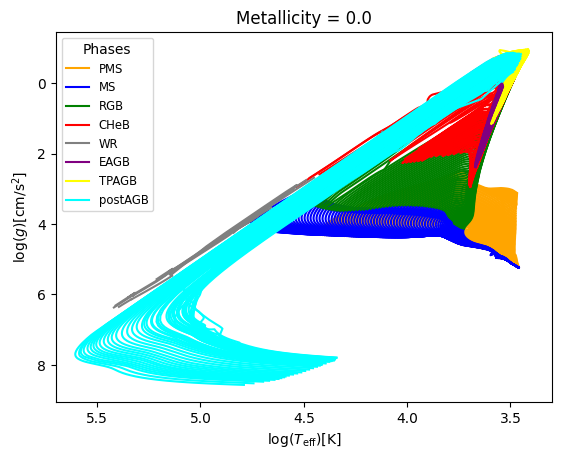

In [4]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [5]:
print_uniques("log10_isochrone_age_yr", iso_df)
print_uniques_count("log10_isochrone_age_yr", iso_df)

log10_isochrone_age_yr : 107 unique values, range [5.0, 10.3]
log10_isochrone_age_yr : 
	5.0 => 3736
	5.05 => 3761
	5.1 => 3784
	5.15 => 3807
	5.2 => 3831
	5.25 => 3852
	5.3 => 3866
	5.35 => 3889
	5.4 => 3904
	5.45 => 3924
	5.5 => 3942
	5.55 => 3959
	5.6 => 3978
	5.65 => 3994
	5.7 => 4011
	5.75 => 4032
	5.8 => 4050
	5.8500000000000005 => 4068
	5.9 => 4083
	5.95 => 4104
	6.0 => 4121
	6.050000000000001 => 4141
	6.1000000000000005 => 4168
	6.15 => 4211
	6.2 => 4295
	6.25 => 4448
	6.300000000000001 => 4699
	6.3500000000000005 => 6427
	6.4 => 7787
	6.45 => 9266
	6.5 => 10509
	6.550000000000001 => 10643
	6.6000000000000005 => 10420
	6.65 => 10288
	6.7 => 10498
	6.75 => 10638
	6.800000000000001 => 10604
	6.8500000000000005 => 10571
	6.9 => 10539
	6.95 => 10503
	7.0 => 10470
	7.050000000000001 => 10433
	7.1000000000000005 => 10397
	7.15 => 10363
	7.200000000000001 => 10327
	7.25 => 10289
	7.300000000000001 => 10245
	7.35 => 9914
	7.4 => 9784
	7.450000000000001 => 9992
	7.5 => 10133
	7.55000000

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


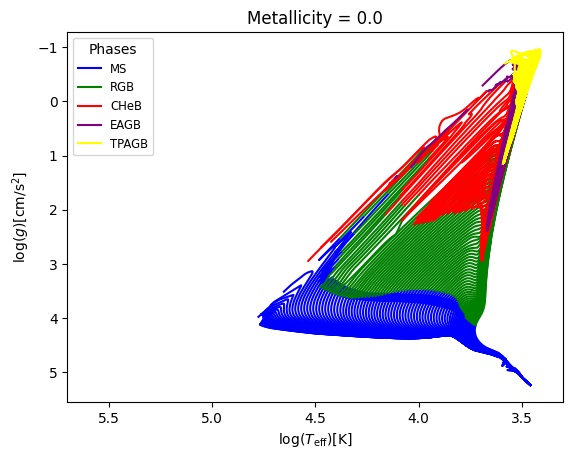

In [6]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [7]:
print_uniques("log10_isochrone_age_yr", phase_filtered_iso_df)
print_uniques_count("log10_isochrone_age_yr", phase_filtered_iso_df)

log10_isochrone_age_yr : 107 unique values, range [5.0, 10.3]
log10_isochrone_age_yr : 
	5.0 => 1093
	5.05 => 1137
	5.1 => 1180
	5.15 => 1227
	5.2 => 1270
	5.25 => 1316
	5.3 => 1358
	5.35 => 1407
	5.4 => 1449
	5.45 => 1498
	5.5 => 1546
	5.55 => 1595
	5.6 => 1644
	5.65 => 1692
	5.7 => 1738
	5.75 => 1790
	5.8 => 1838
	5.8500000000000005 => 1888
	5.9 => 1937
	5.95 => 1989
	6.0 => 2040
	6.050000000000001 => 2098
	6.1000000000000005 => 2158
	6.15 => 2228
	6.2 => 2334
	6.25 => 2500
	6.300000000000001 => 2763
	6.3500000000000005 => 4479
	6.4 => 4905
	6.45 => 5921
	6.5 => 7373
	6.550000000000001 => 7782
	6.6000000000000005 => 7643
	6.65 => 8097
	6.7 => 8892
	6.75 => 9072
	6.800000000000001 => 9072
	6.8500000000000005 => 9072
	6.9 => 9072
	6.95 => 9071
	7.0 => 9071
	7.050000000000001 => 9070
	7.1000000000000005 => 9070
	7.15 => 9070
	7.200000000000001 => 9069
	7.25 => 9064
	7.300000000000001 => 9055
	7.35 => 8758
	7.4 => 8661
	7.450000000000001 => 8901
	7.5 => 9073
	7.550000000000001 => 9068
	7

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.00,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.00,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.00,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.00,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.00,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
709110,8.95,3.497439,-0.693459,5.0,0.50,0.653148,2.473306
709111,8.95,3.513628,-0.635686,5.0,0.50,0.642987,2.441014
709112,8.95,3.529786,-0.576201,5.0,0.50,0.635277,2.408652
709113,8.95,3.545947,-0.515559,5.0,0.50,0.629490,2.376344


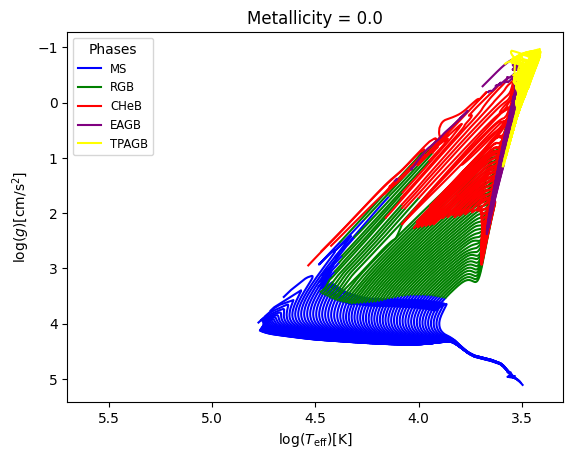

In [8]:
phase_age_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], "log10_isochrone_age_yr" : ("<", 9)})
display(phase_age_filtered_iso_df)
data_visualiser_phase_age_filtered = Data_visualiser(phase_age_filtered_iso_df, physical_model)
data_visualiser_phase_age_filtered.plot_Kiel([], [0.0])

In [9]:
print_all_uniques(phase_age_filtered_iso_df)

log10_isochrone_age_yr  : Range : 5.0 - 8.95, Mean : 7.7619, Median : 7.95

log_Teff  : Range : 3.35 - 5.3788, Mean : 3.9507, Median : 3.8677

log_g  : Range : -1.14 - 6.2594, Mean : 2.2863, Median : 2.6557

Values in phase column : 0.0, 2.0, 3.0, 4.0, 5.0 

Values in metallicity column : -0.25, -0.5, -0.75, -1.0, -1.25, -1.5, -1.75, -2.0, -2.5, -3.0, -3.5, -4.0, 0.0, 0.25, 0.5 

star_mass  : Range : 0.11 - 298.5448, Mean : 11.4704, Median : 3.6371

log_R  : Range : -0.95 - 3.1298, Mean : 1.4163, Median : 1.3648



In [10]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_age_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.1126399518214333 - 298.5447575808816
Median value in train data for the mass parameter: 3.6316240293454953
Mean value in train data for the mass parameter: 11.477051946792198
Range in train data for the radius parameter : -0.9506796566344224 - 3.129269620812593
Median value in train data for the radius parameter: 1.3657825625855695
Mean value in train data for the radius parameter: 1.416505637137314

Testing set statistics:
Range in test data for the mass parameter : 0.1152306901329256 - 296.5221171165397
Median value in test data for the mass parameter: 3.654650252722567
Mean value in test data for the mass parameter: 11.450418901093462
Range in test data for the radius parameter : -0.9297114964181278 - 3.1297545143214007
Median value in test data for the radius parameter: 1.3614997568459362
Mean value in test data for the radius parameter: 1.4158596653935527

(531836, 4) (177279, 4)
(531836, 2) (177279, 2)


## Model training

### Linear regression

In [ ]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


age_filtered_9 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.35099418522138437
RMSE :  20.31025787668588
MAE :  9.687150805047574
MedAE :  5.327253736430578
CORR :  0.5924476226912669
MAX_ER :  252.99555891779693
Percentiles : 
  75th percentile :  11.72572089185125
  90th percentile :  19.081798424067266
  95th percentile :  25.4053479538137
  99th percentile :  89.15849345638797



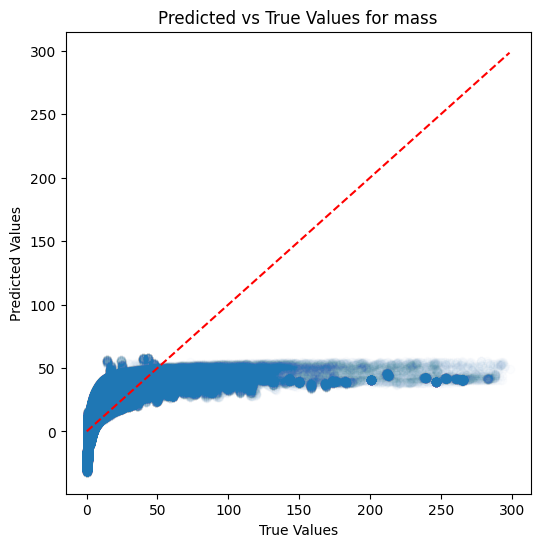

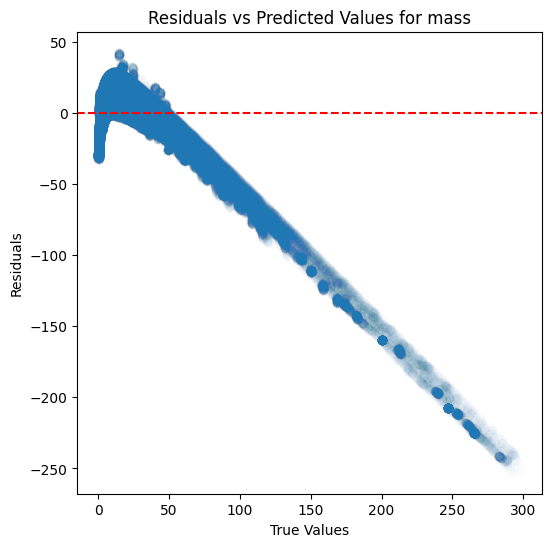

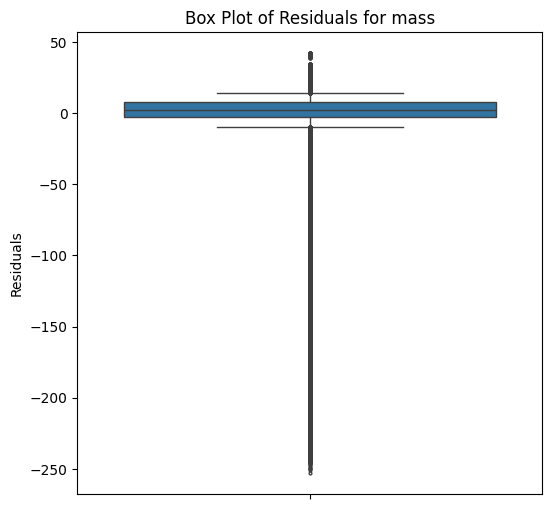

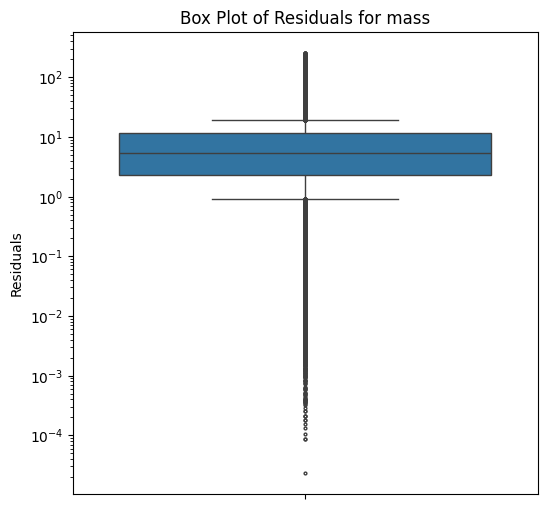

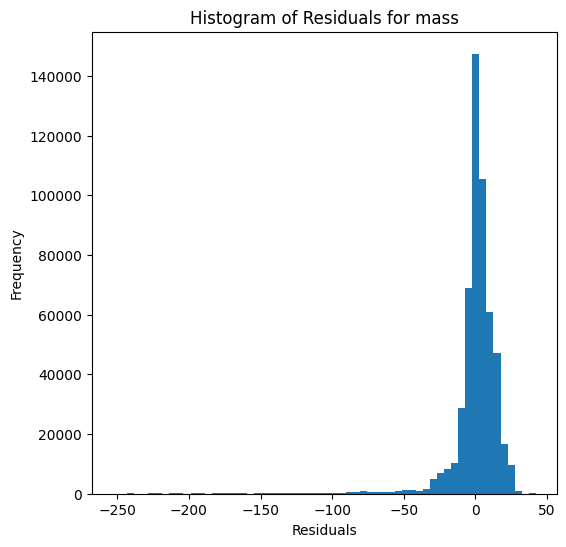

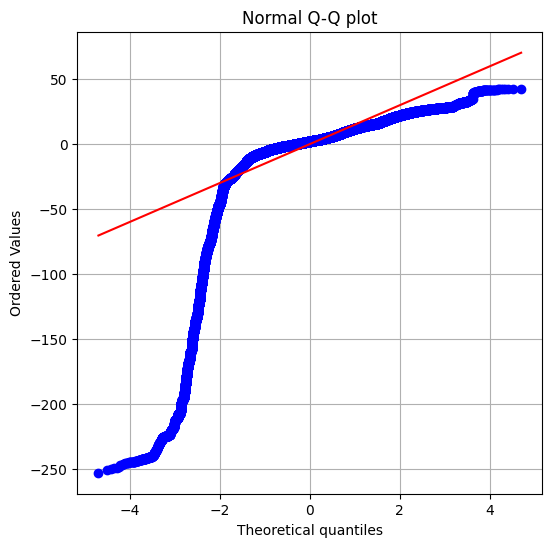


radius results:
RVE :  0.9876869218571414
RMSE :  0.10514176451823155
MAE :  0.07847834004151566
MedAE :  0.05843539270103293
CORR :  0.9938243918606257
MAX_ER :  0.4750715021449913
Percentiles : 
  75th percentile :  0.11442173693816071
  90th percentile :  0.16885057647360874
  95th percentile :  0.21180171827998134
  99th percentile :  0.3164785747955201



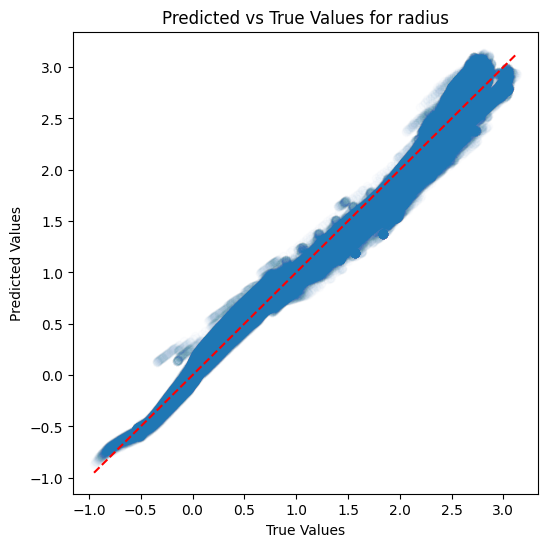

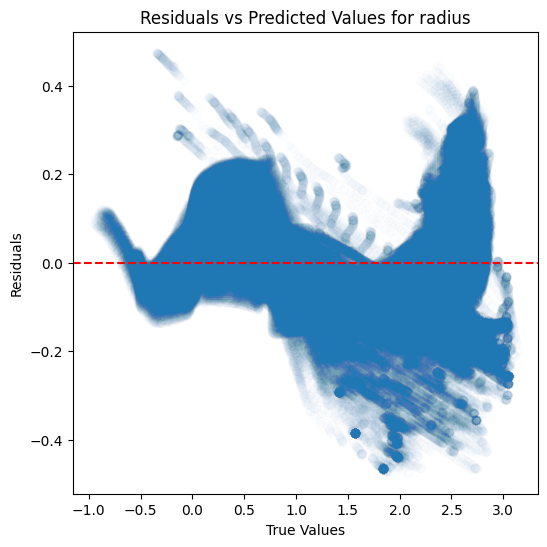

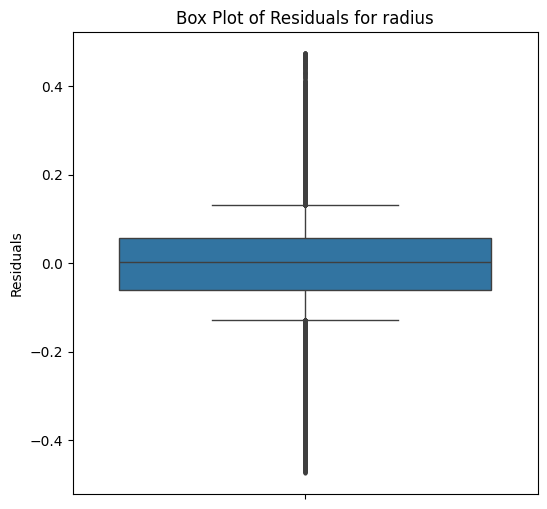

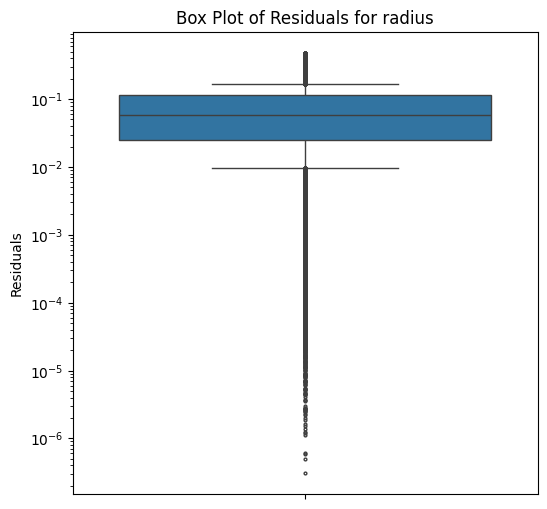

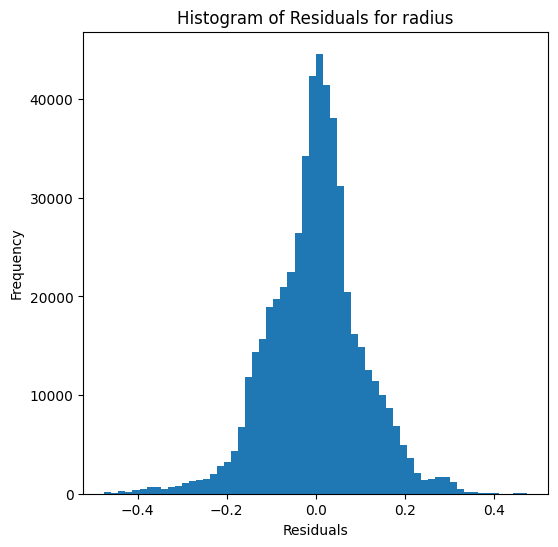

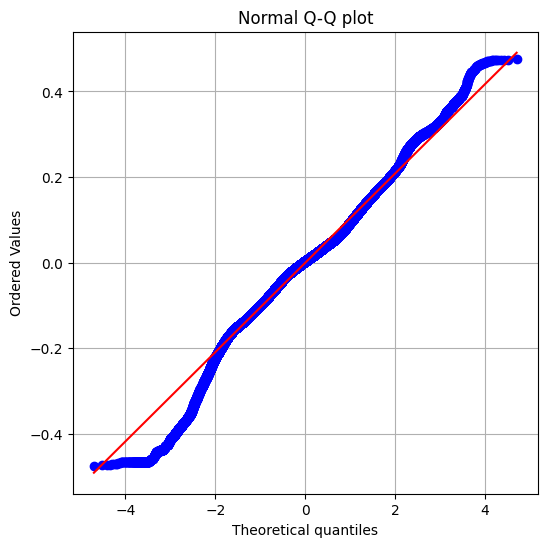

In [ ]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [ ]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


age_filtered_9 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9947650018373563
RMSE :  1.8241037117755483
MAE :  0.19937262889033022
MedAE :  0.006263011848463451
CORR :  0.9973821321009454
MAX_ER :  201.34480371427634
Percentiles : 
  75th percentile :  0.04001678658428465
  90th percentile :  0.18227834701619616
  95th percentile :  0.3946352568040563
  99th percentile :  3.9910028604980567



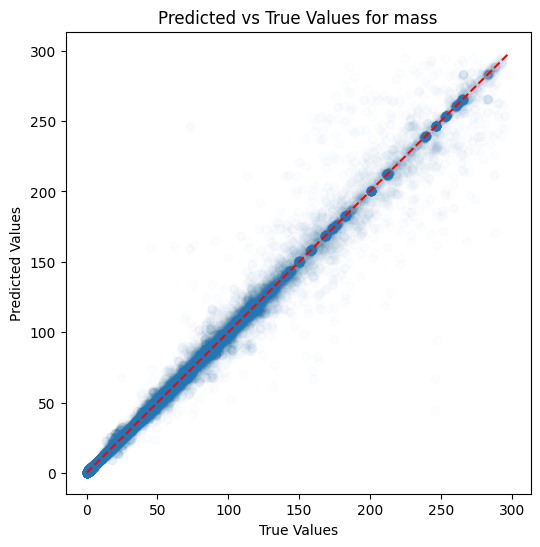

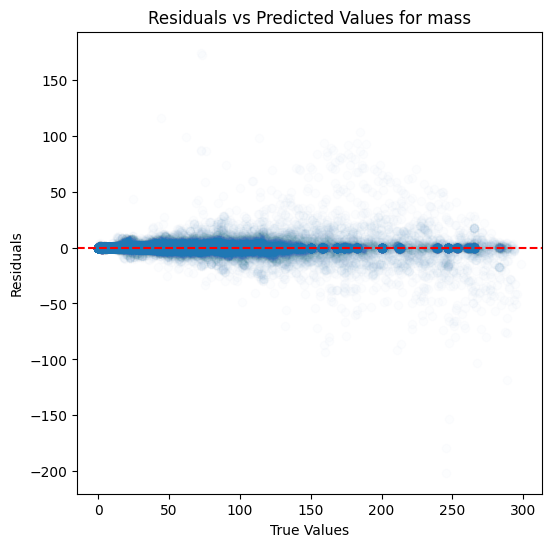

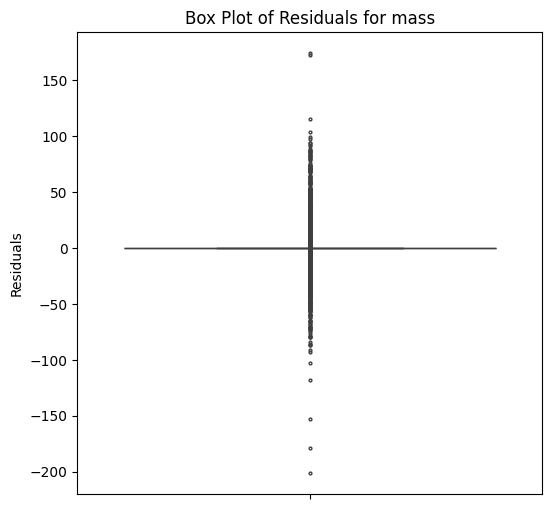

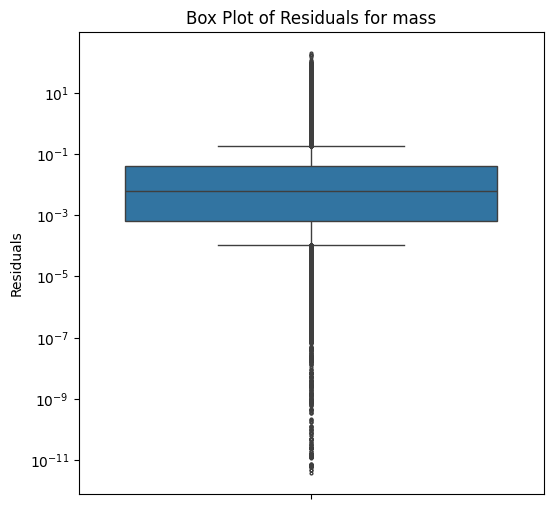

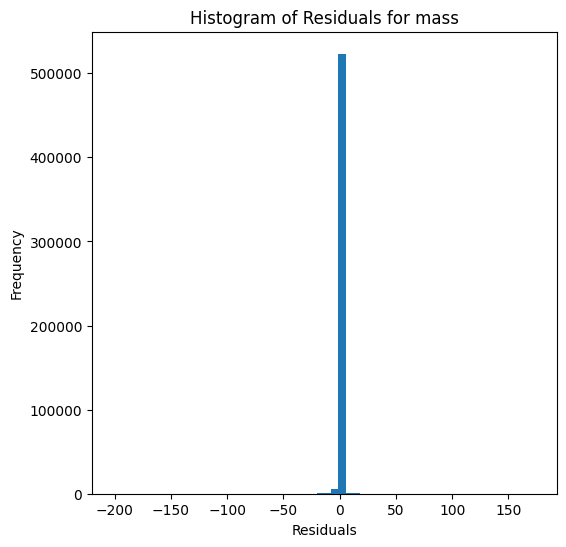

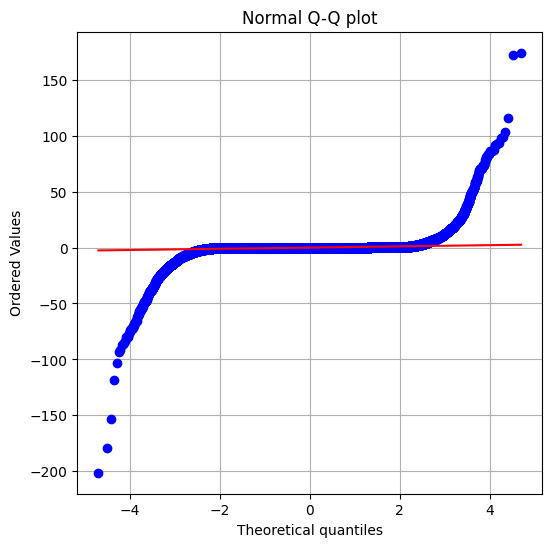


radius results:
RVE :  0.9998256621433711
RMSE :  0.012510922005878907
MAE :  0.0068093090067463564
MedAE :  0.0037078604845177665
CORR :  0.9999128557722172
MAX_ER :  0.40323306832377215
Percentiles : 
  75th percentile :  0.008210720623854417
  90th percentile :  0.015604089759784667
  95th percentile :  0.02340317858668084
  99th percentile :  0.05093432756651195



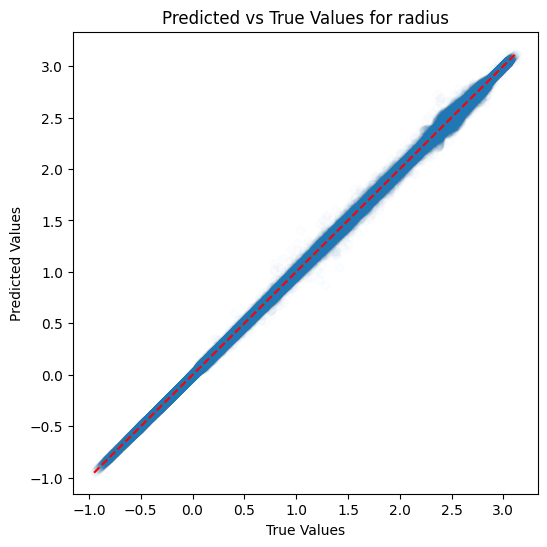

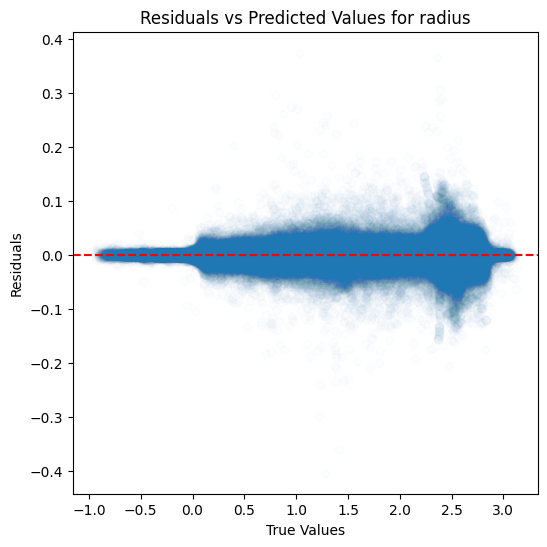

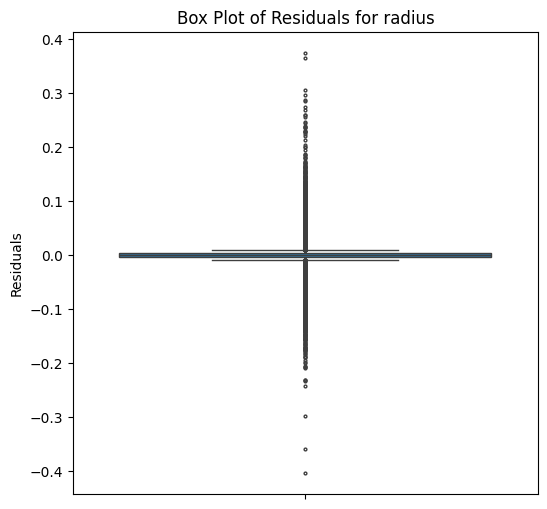

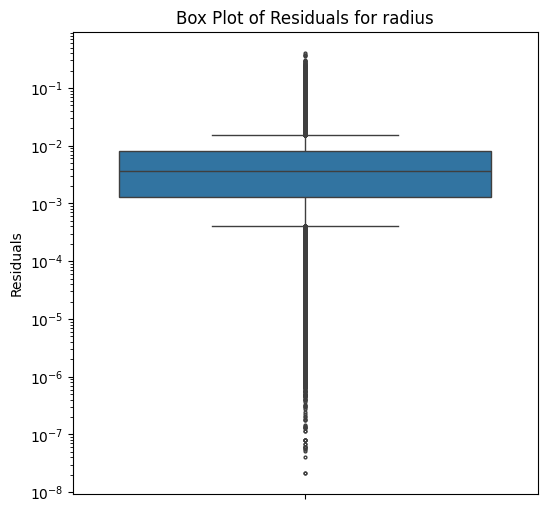

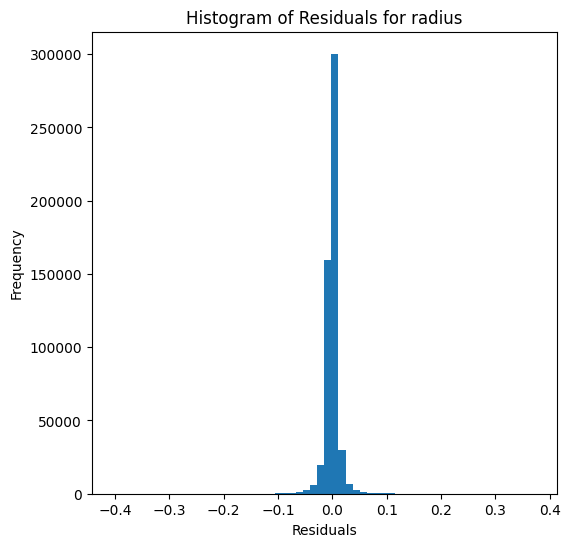

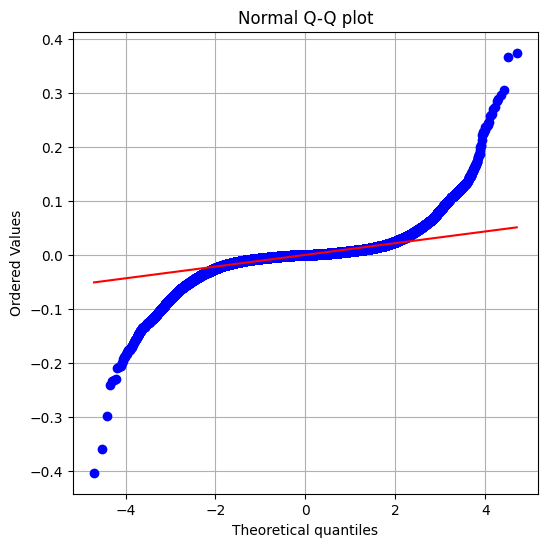

In [ ]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [ ]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


age_filtered_9 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9901399180104423
RMSE :  2.503819963535277
MAE :  0.31654917178920433
MedAE :  0.02146053575934659
CORR :  0.9951520178153316
MAX_ER :  132.6921488968142
Percentiles : 
  75th percentile :  0.08983626598648731
  90th percentile :  0.2742329223915252
  95th percentile :  0.636893190849869
  99th percentile :  6.044496677463571



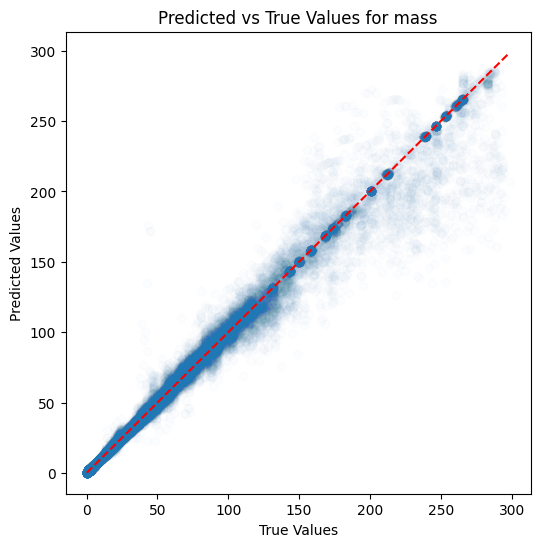

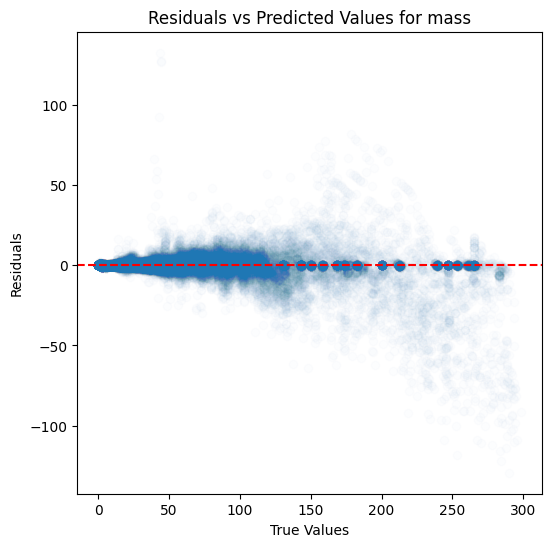

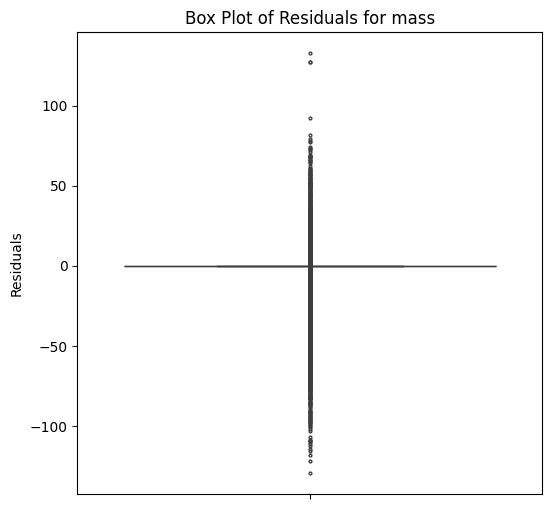

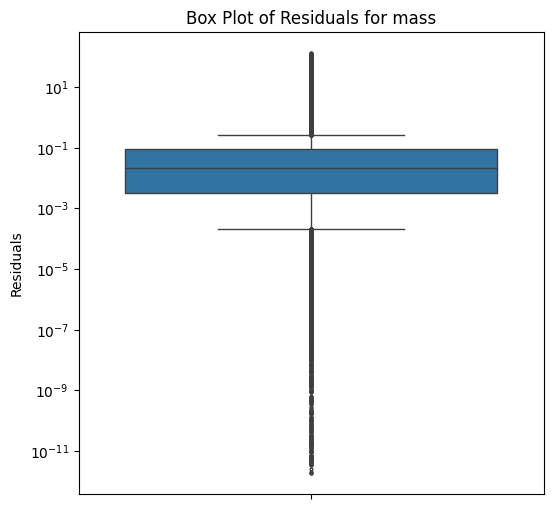

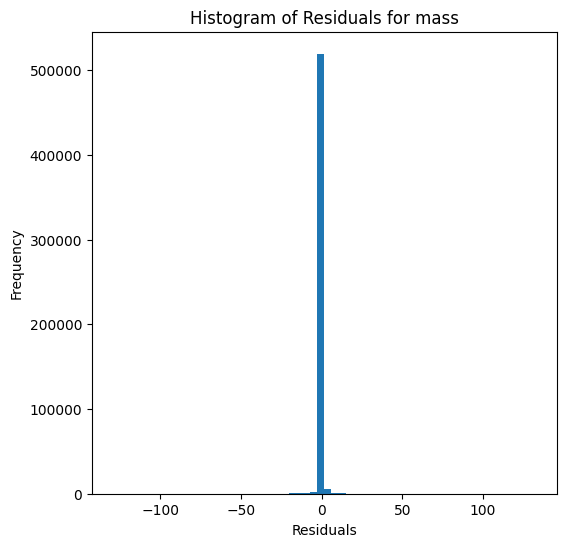

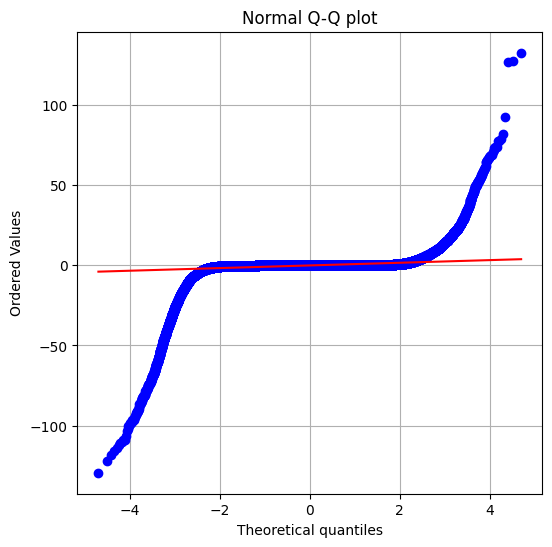


radius results:
RVE :  0.9998898256469749
RMSE :  0.009945657726986842
MAE :  0.00525456213248739
MedAE :  0.002739576827032353
CORR :  0.9999449199328434
MAX_ER :  0.32129347322011015
Percentiles : 
  75th percentile :  0.006069904435237139
  90th percentile :  0.012039979323024363
  95th percentile :  0.018313053223706688
  99th percentile :  0.041665751046105794



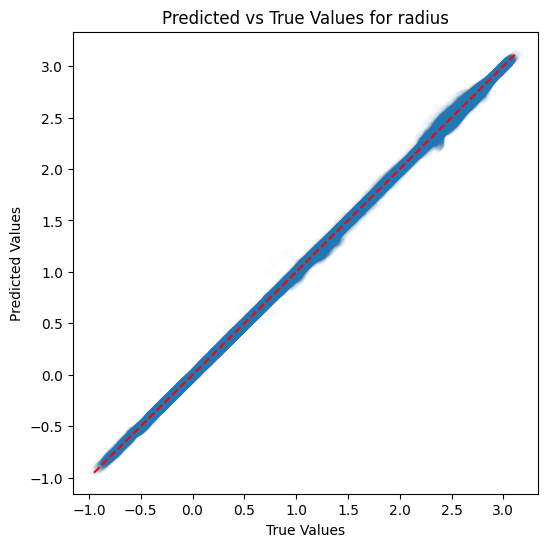

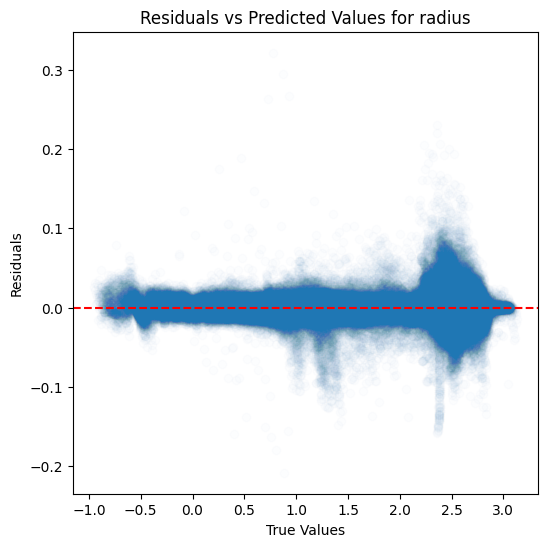

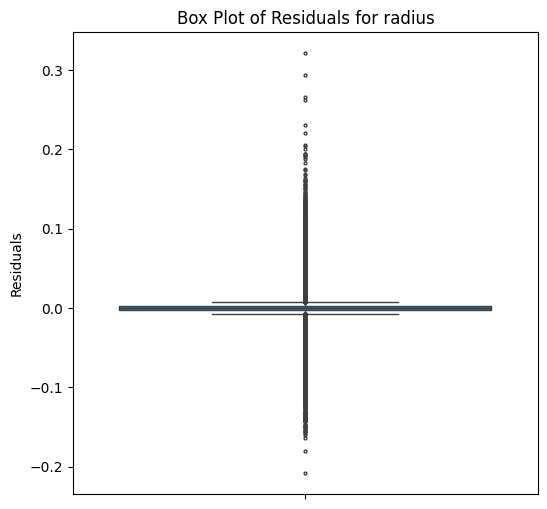

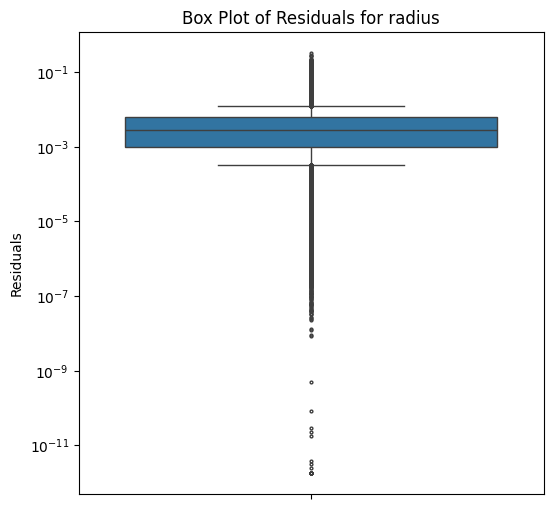

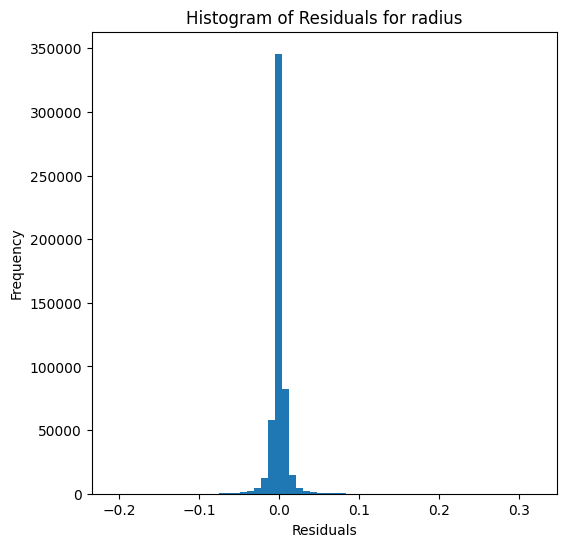

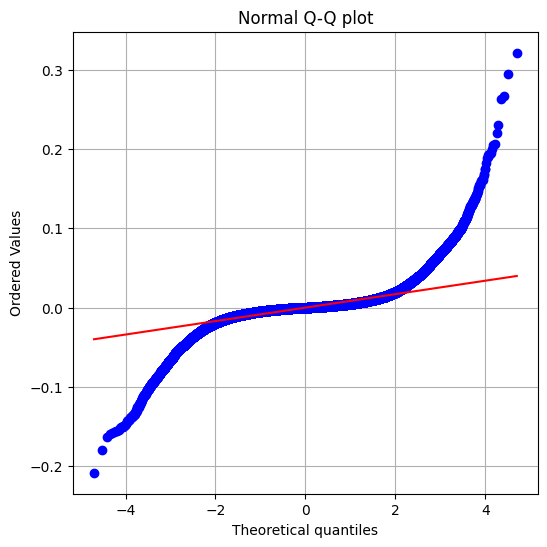

In [ ]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [ ]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


age_filtered_9 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9976482175033246
RMSE :  1.2226172373736097
MAE :  0.148833399758343
MedAE :  0.009139009169107482
CORR :  0.9988248493253087
MAX_ER :  103.48479109891773
Percentiles : 
  75th percentile :  0.039915788818925435
  90th percentile :  0.14042828044155464
  95th percentile :  0.30878301366626104
  99th percentile :  2.8312513281944973



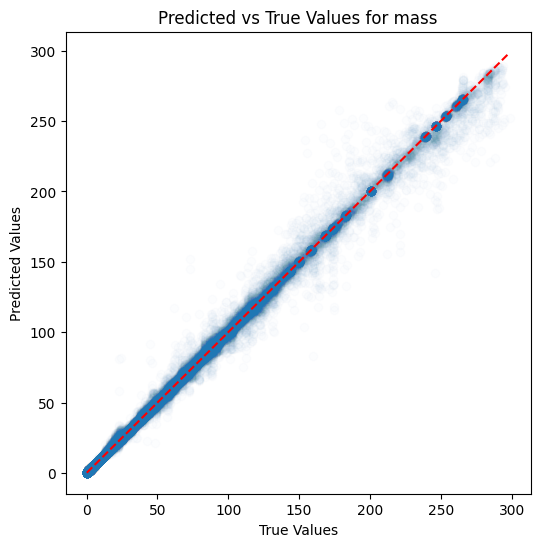

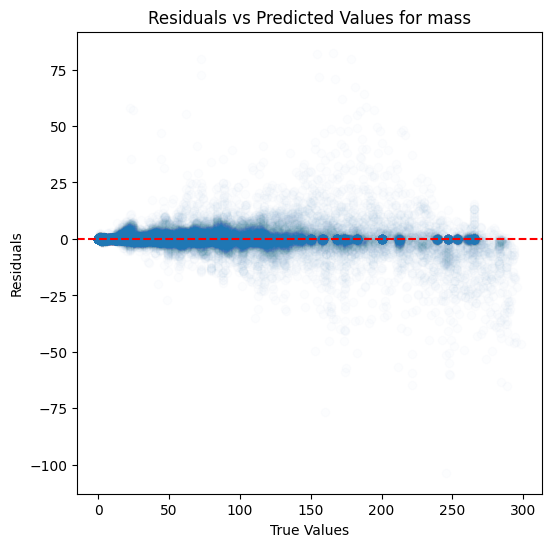

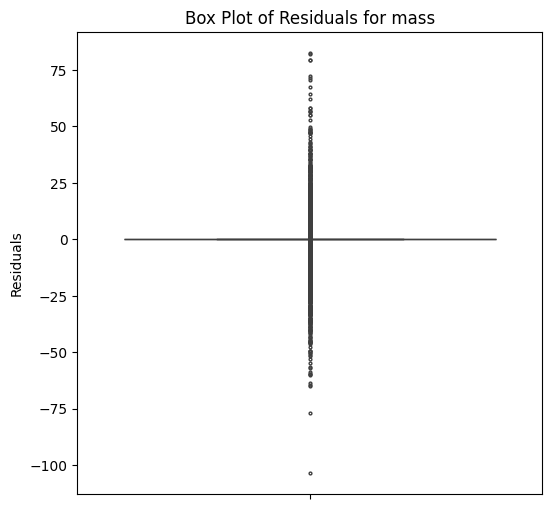

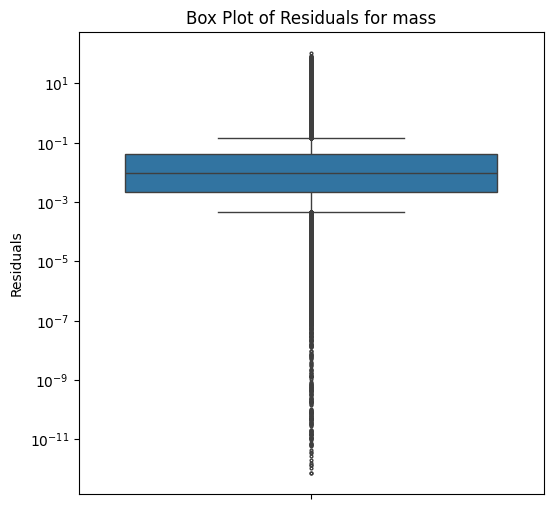

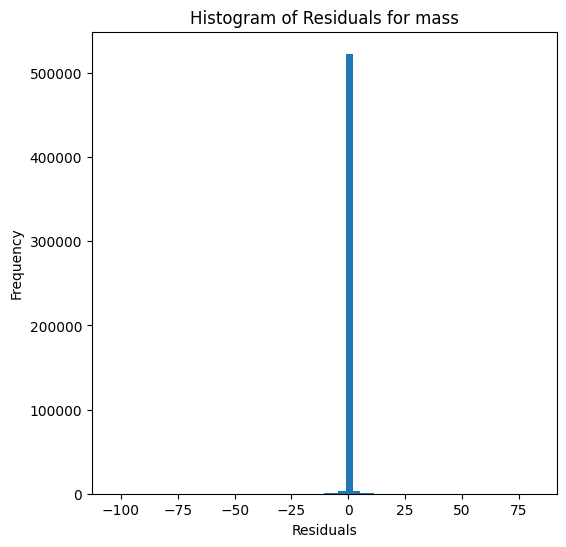

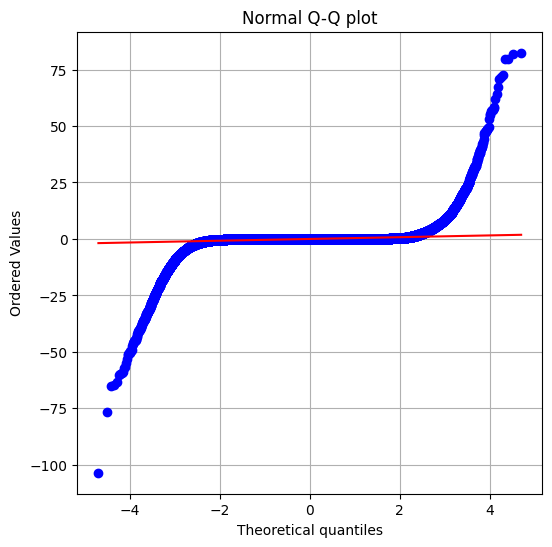


radius results:
RVE :  0.9999346343917662
RMSE :  0.007660670691525794
MAE :  0.0039000946652366086
MedAE :  0.001785213446094558
CORR :  0.9999673182126749
MAX_ER :  0.2907878174728342
Percentiles : 
  75th percentile :  0.004536387926005053
  90th percentile :  0.009434219316153125
  95th percentile :  0.01430589209897093
  99th percentile :  0.030568600165339983



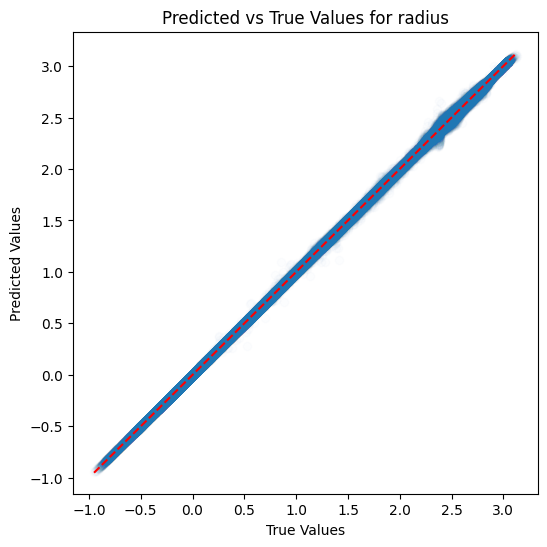

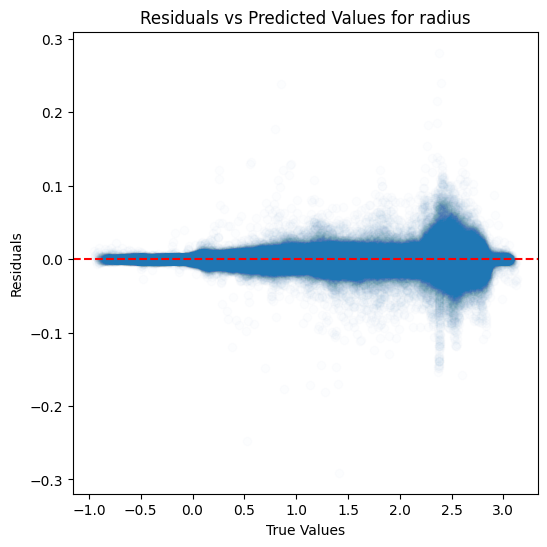

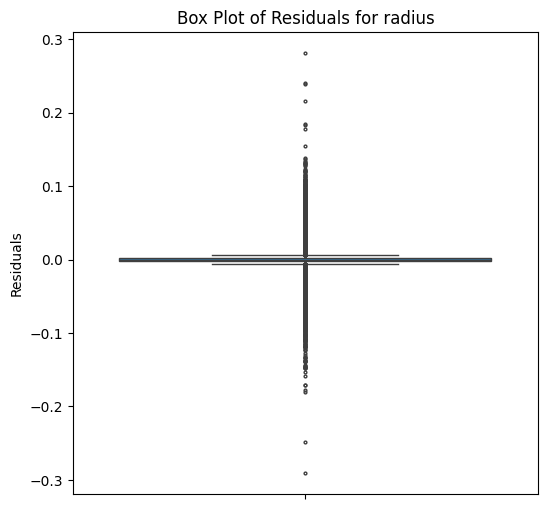

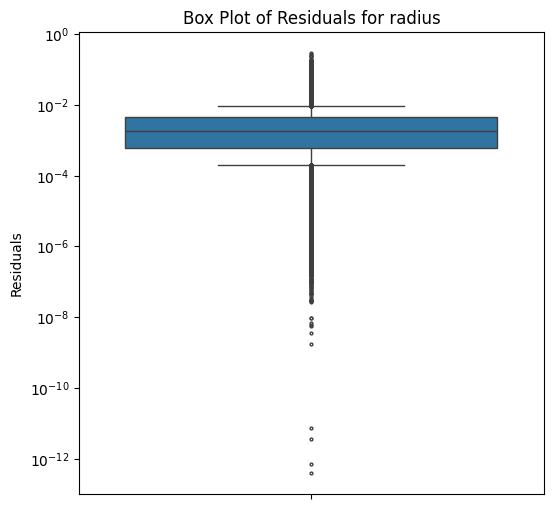

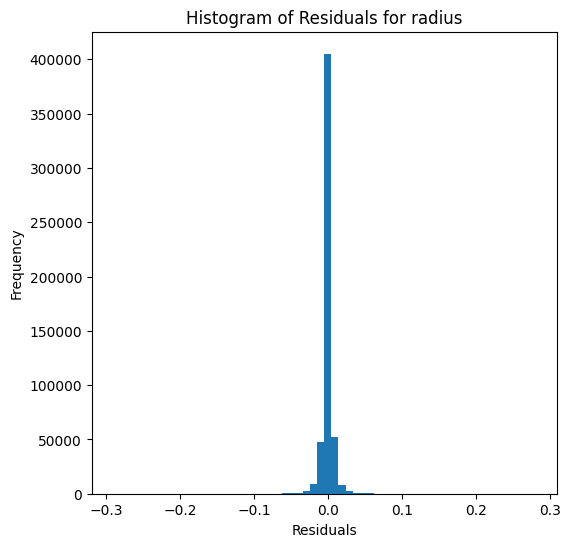

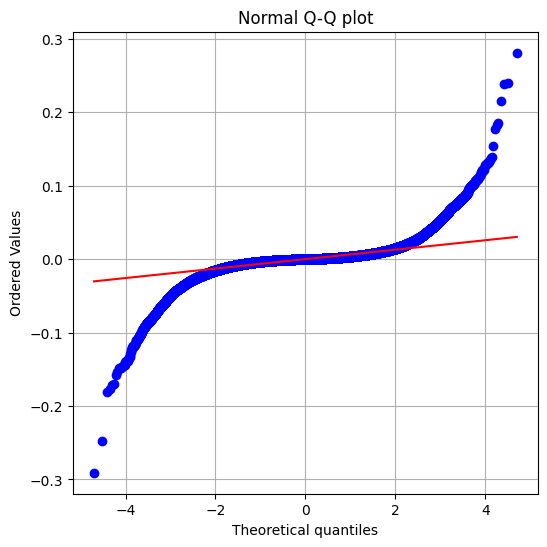

In [ ]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [ ]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


age_filtered_9 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9937421796959751
RMSE :  1.9943571563492157
MAE :  0.5540657131650586
MedAE :  0.16694430258794224
CORR :  0.9968665450066393
MAX_ER :  82.16012601058156
Percentiles : 
  75th percentile :  0.3550260535270221
  90th percentile :  0.9142374571397855
  95th percentile :  2.034816444901629
  99th percentile :  8.11374281904367



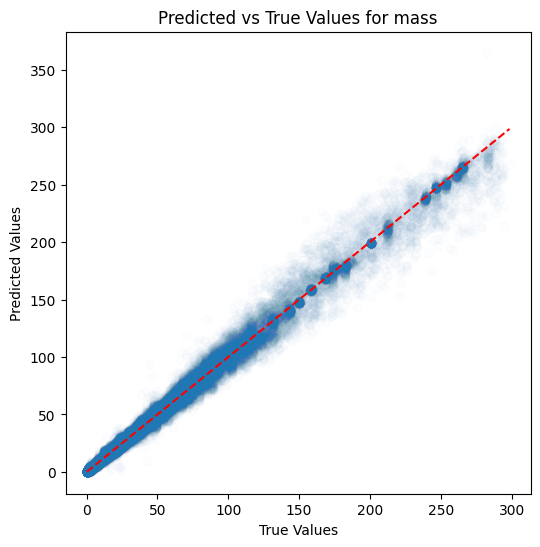

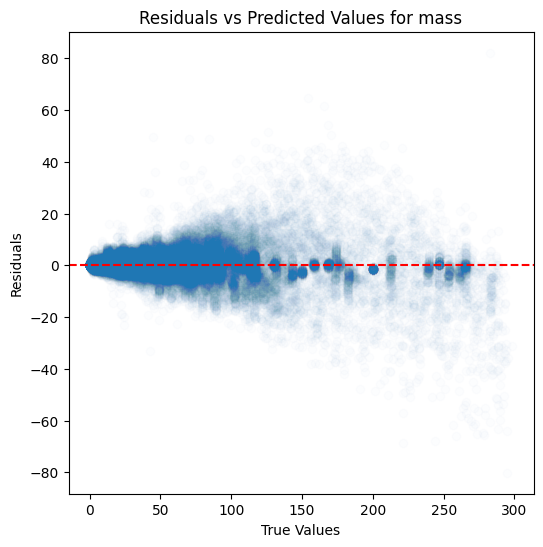

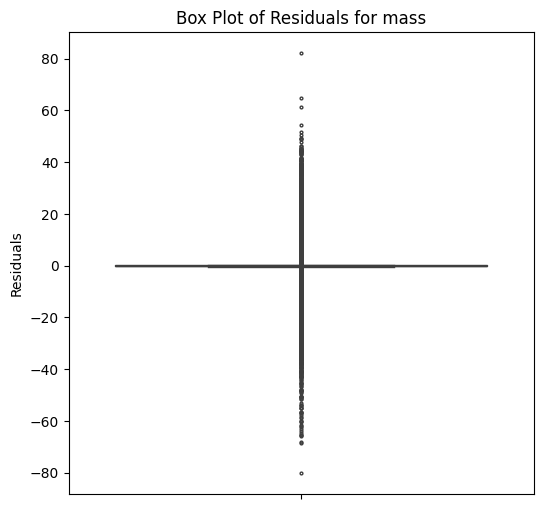

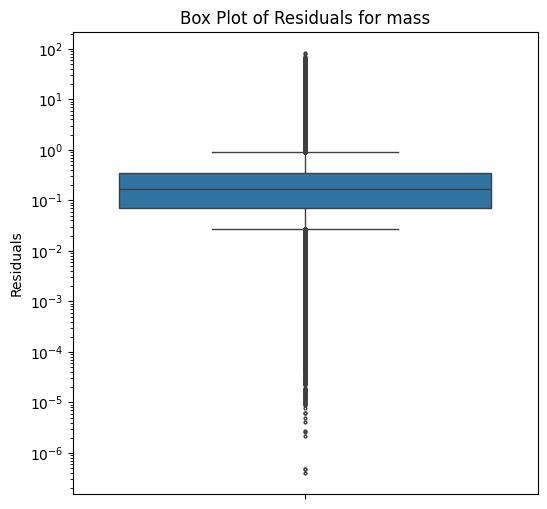

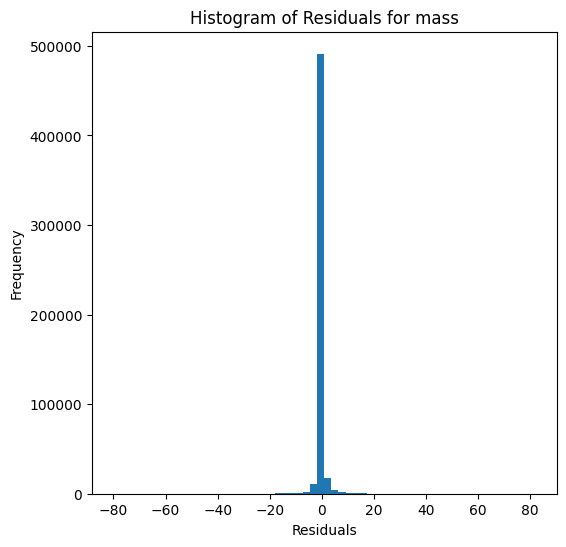

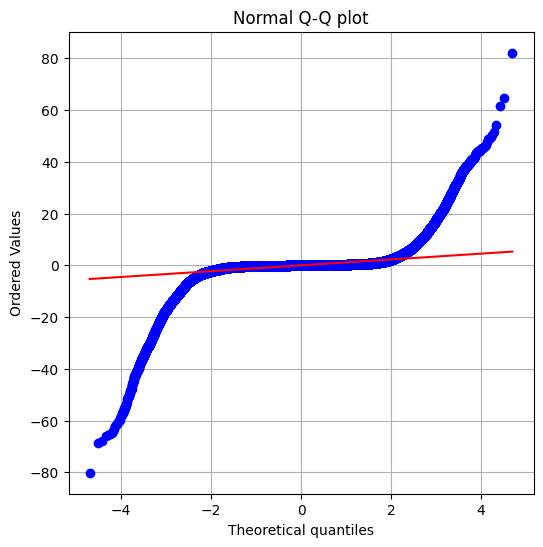


radius results:
RVE :  0.9996729813906859
RMSE :  0.017134766405611443
MAE :  0.012589829780433279
MedAE :  0.00964673625050391
CORR :  0.9998364811401572
MAX_ER :  0.4974158250752564
Percentiles : 
  75th percentile :  0.017322973181903005
  90th percentile :  0.02683163168725891
  95th percentile :  0.03399916990265062
  99th percentile :  0.052837271884019266



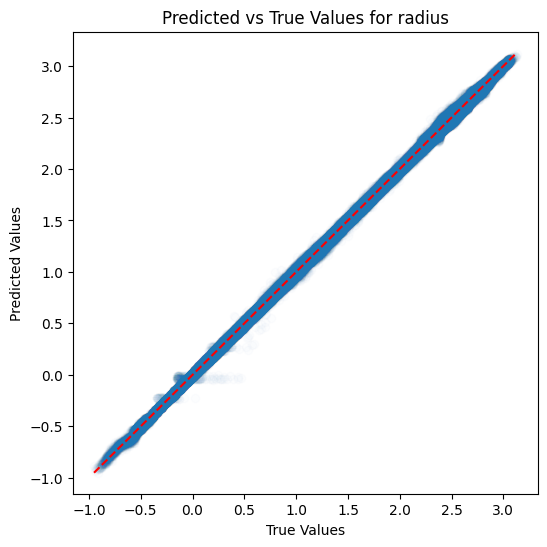

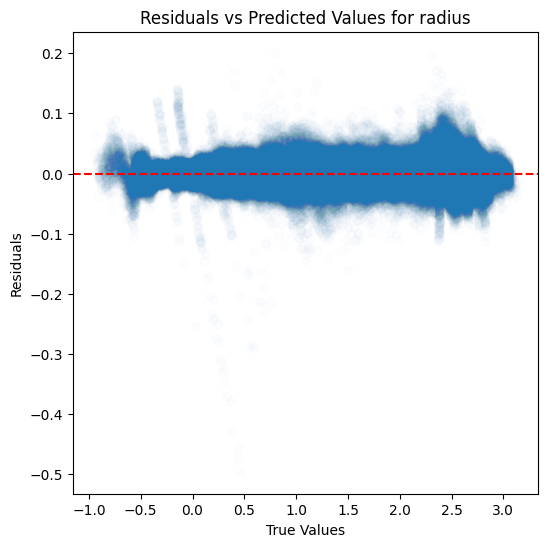

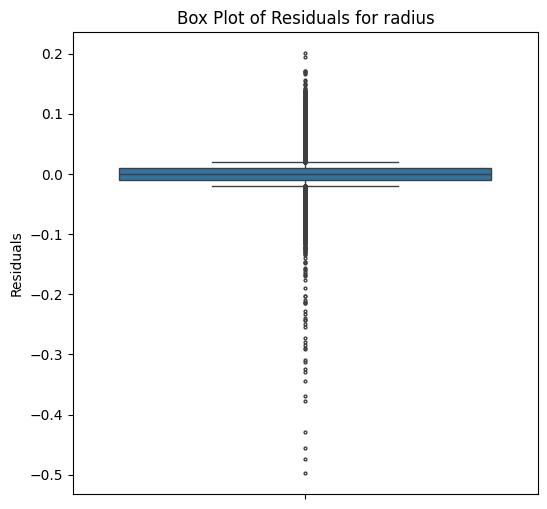

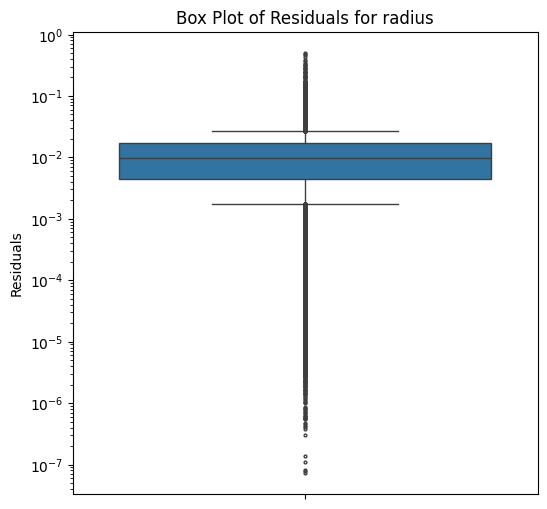

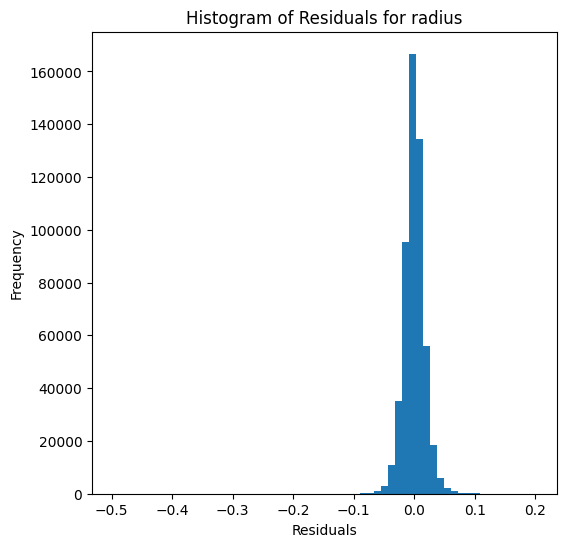

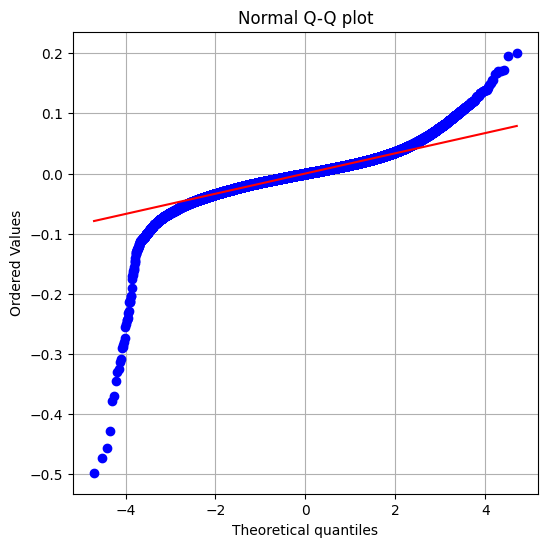

In [ ]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [ ]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


age_filtered_9 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.1710664134959146
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.1972702473262866
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.230321735602612
4 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.2570286096334637
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.2968751559905676

mass results:
RVE :  0.9823018116290078
RMSE :  3.3714396945551637
MAE :  0.9598519491081561
MedAE :  0.2755211635412331
CORR :  0.9920186878897392
MAX_ER :  168.07979004503795
Percentiles : 
  75th percentile :  0.5453981810218709
  90th percentile :  1.4460265086502107
  95th percentile :  4.104586077190713
  99th percentile :  14.919841520065205



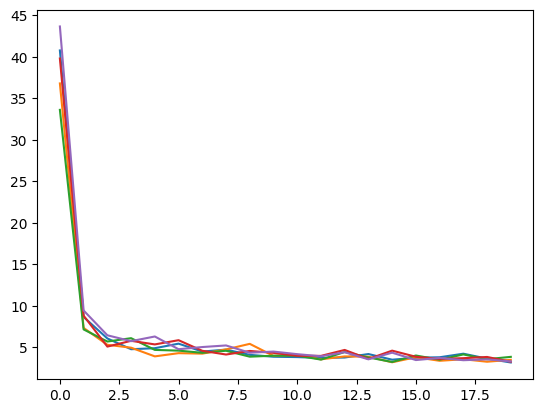

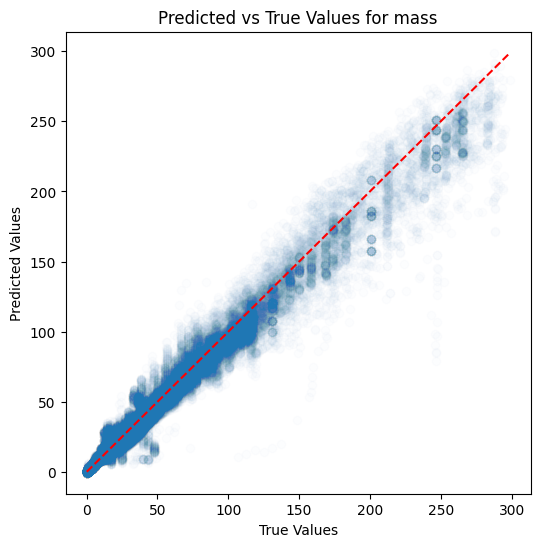

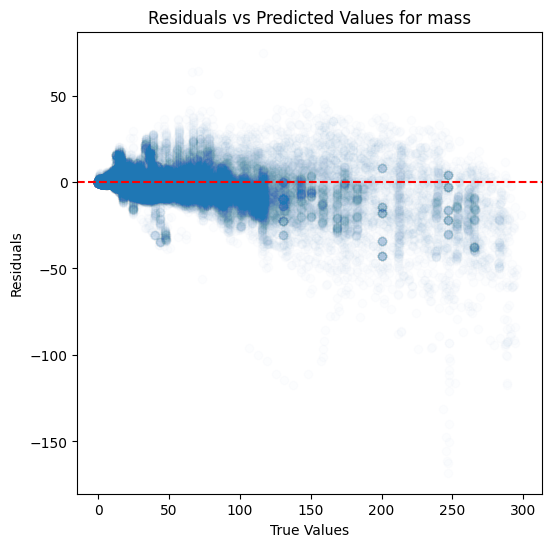

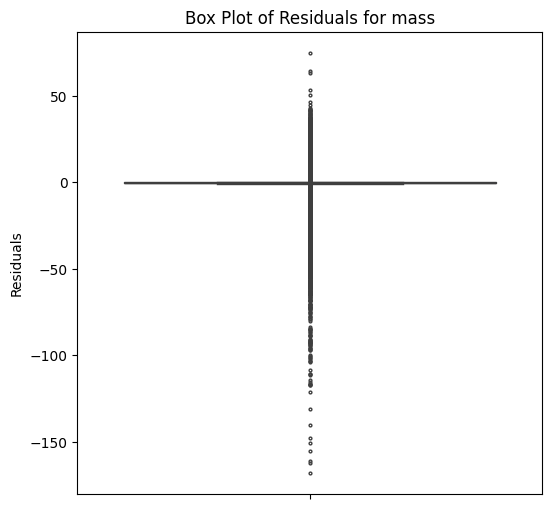

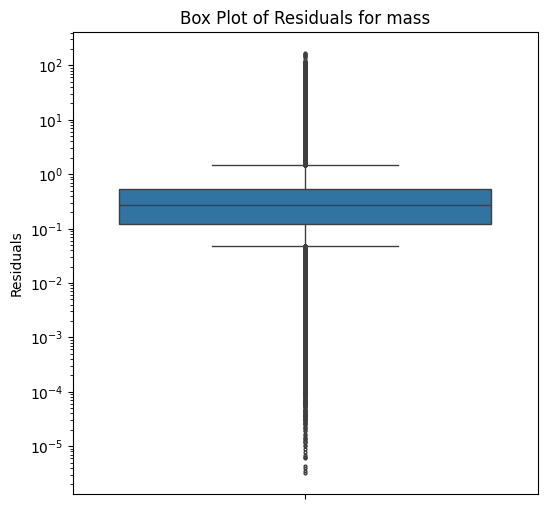

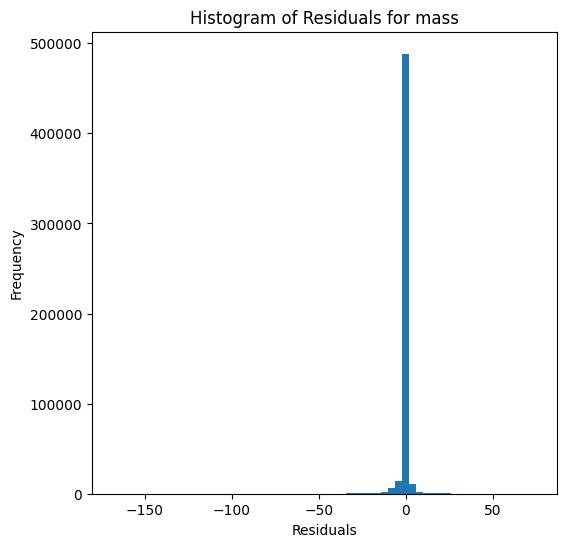

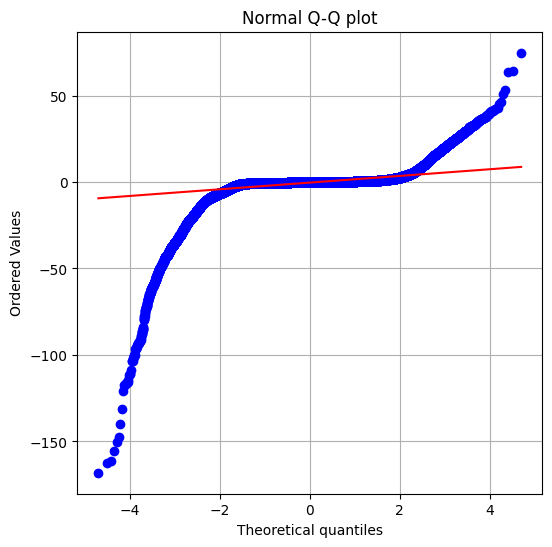


radius results:
RVE :  0.9960963972155822
RMSE :  0.059973955504998844
MAE :  0.044864861027492216
MedAE :  0.03481369405739243
CORR :  0.9980482268105499
MAX_ER :  0.6120855142827277
Percentiles : 
  75th percentile :  0.06279191113457158
  90th percentile :  0.09555607371637426
  95th percentile :  0.11948423488010368
  99th percentile :  0.18298373505124002



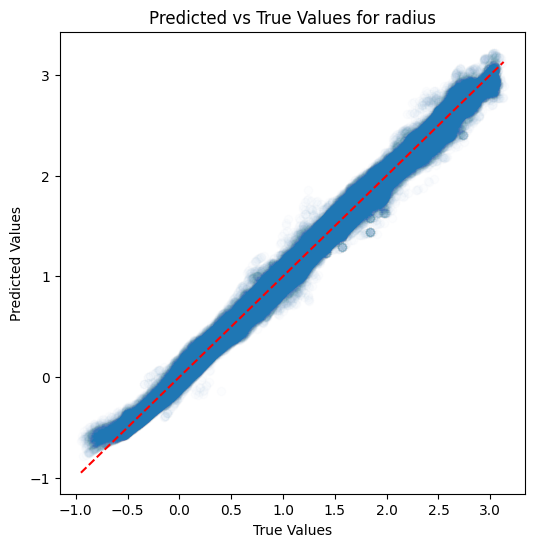

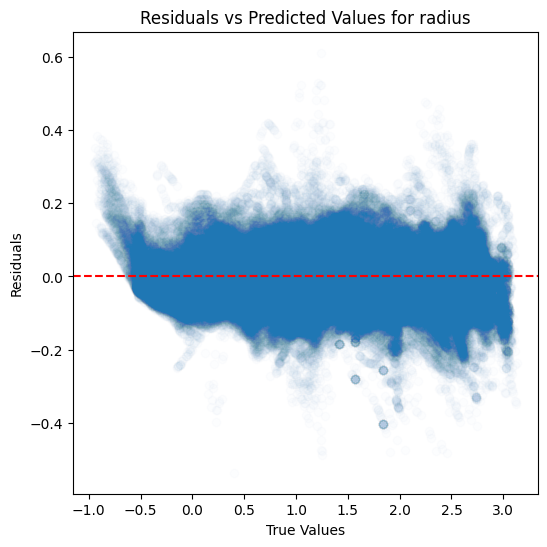

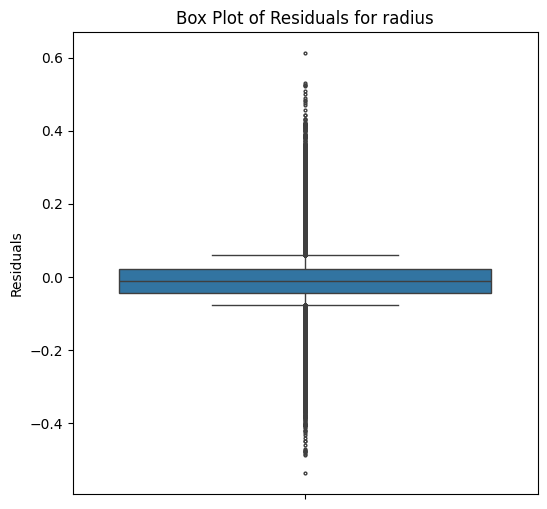

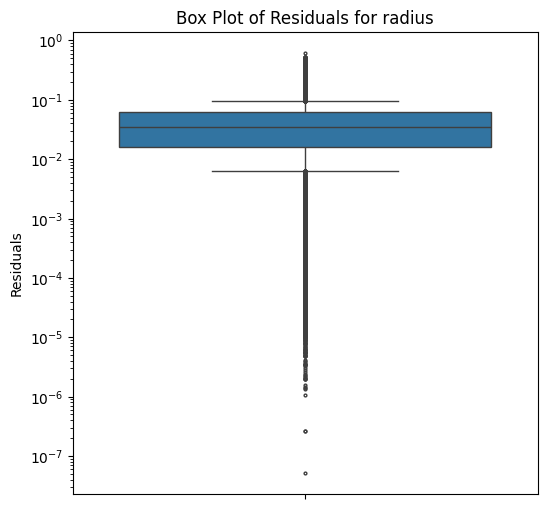

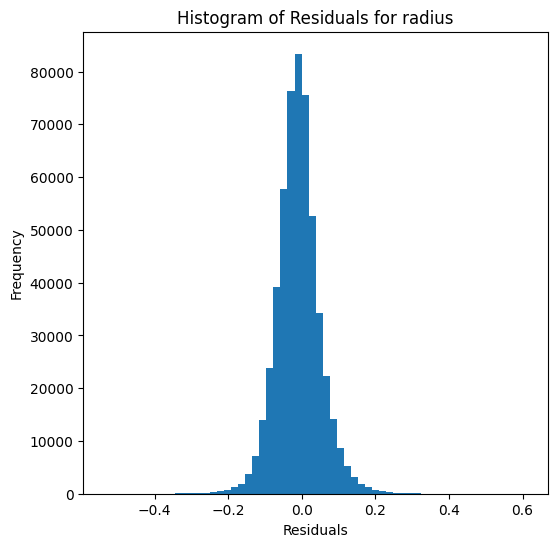

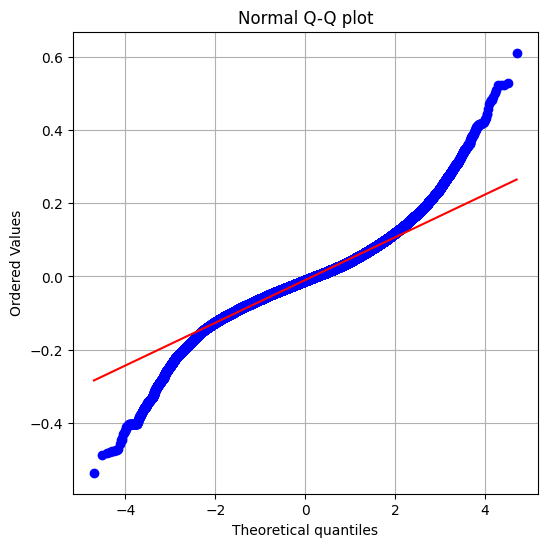

In [ ]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)